# Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keras is only to get boston housing data
# boston housing is also here: from sklearn.datasets import load_boston
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\phoenix\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

# Loading Data

In [83]:
phoenix = pd.read_csv('final_summer_16_only_buildings_converted.csv')

phoenix.isnull().any()


FID                           False
temp                          False
ndvi                          False
ROOFTYPE                      False
Max_Area_Single_Building      False
Max_Building_Area_Rooftype    False
AVGHT_M                       False
MAXHT_M                       False
High Density Percentage       False
Medium Density Percentage     False
Low Density Percentage        False
Shrub Percentage              False
Percent Renter                False
dist_center_km                False
CBG_area_km                   False
AREA_M2_km                    False
Median_HH_Income_Thousands    False
Pop_density_thousands         False
dtype: bool

<AxesSubplot:>

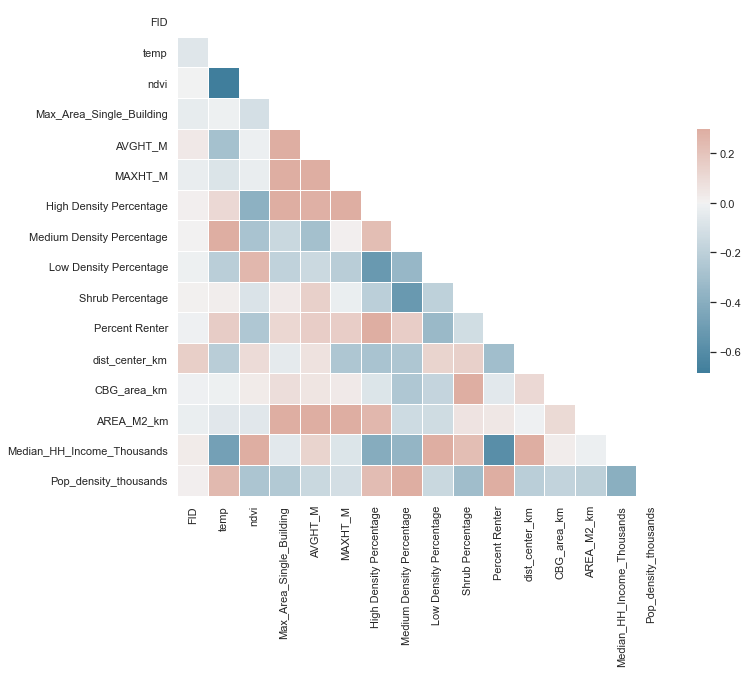

In [84]:
sns.set_theme(style="white")
corr = phoenix.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [85]:
phoenix.head()
phoenix = pd.get_dummies(phoenix)
phoenix.iloc[:,0:].head()

,FID,temp,ndvi,Max_Area_Single_Building,AVGHT_M,MAXHT_M,High Density Percentage,Medium Density Percentage,Low Density Percentage,Shrub Percentage,...,CBG_area_km,AREA_M2_km,Median_HH_Income_Thousands,Pop_density_thousands,ROOFTYPE_Complex,ROOFTYPE_Flat,ROOFTYPE_Pitched,Max_Building_Area_Rooftype_Complex,Max_Building_Area_Rooftype_Flat,Max_Building_Area_Rooftype_Pitched
0,6,50.051790,0.218881,5417.874,3.504549,23.37,0.05,0.31,0.21,0.03,...,1.247750,0.134844,29.738,2.611323,0,1,0,0,1,0
1,7,51.547895,0.126049,2035.870,3.046672,15.44,0.09,0.49,0.07,0.02,...,1.103573,0.142042,27.457,2.963598,0,1,0,0,0,1
2,8,50.747488,0.143357,1297.170,3.143304,18.59,0.01,0.21,0.28,0.01,...,1.084723,0.100119,41.193,6.673802,1,0,0,0,1,0
3,9,47.575352,0.297048,7830.566,4.162645,20.62,0.02,0.12,0.22,0.06,...,3.691126,0.195519,45.673,2.222468,0,0,1,0,1,0
4,10,51.004228,0.142109,2792.202,3.051258,13.32,0.01,0.21,0.33,0.05,...,0.899486,0.104449,37.014,12.807619,0,0,1,0,1,0


# Converting Data

In [86]:
phoenix = pd.read_csv('FINAL_SUMMER_16.csv')

phoenix = pd.get_dummies(phoenix)

phoenix.iloc[:,0:].head()

labels = np.array(phoenix['temp'])

phoenix = phoenix.drop('temp', axis = 1)

phoenix = phoenix.drop('FID', axis = 1)

feature_list = list(phoenix.columns)

phoenix = phoenix.reset_index()

phoenix = np.array(phoenix)

In [121]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(phoenix, labels, test_size = 0.25, random_state = 103)


#train_features = np.nan_to_num(train_features.astype(np.float32))
#test_features = np.nan_to_num(train_features.astype(np.float32))
#train_labels = np.nan_to_num(train_features.astype(np.float32))
#test_labels = np.nan_to_num(train_features.astype(np.float32))

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (1878, 21)
Training Labels Shape: (1878,)
Testing Features Shape: (627, 21)
Testing Labels Shape: (627,)


float64


array([45.15377305, 49.65209661, 48.88846248, ..., 50.12275723,
       50.34017772, 46.5065757 ])

In [122]:
# The baseline predictions are the historical averages

type(average)
baseline_preds = np.average(labels)
#Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  1.25


In [123]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 167)
# Train the model on training data
rf.fit(train_features, train_labels);

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [119]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


ValueError: operands could not be broadcast together with shapes (1878,) (627,) 